<a href="https://colab.research.google.com/github/Majidul17068/PyLab/blob/master/PricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# module and library 
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import pandas as np
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/PricePredictor.csv"
df = pd.read_csv(path) #df for dataframe,read the data from the csv data file
df

,unit_kg,price
0,1,10
1,2,20
2,3,25
3,4,40
4,5,55
5,6,75
6,7,90
7,8,100
8,9,115
9,10,120


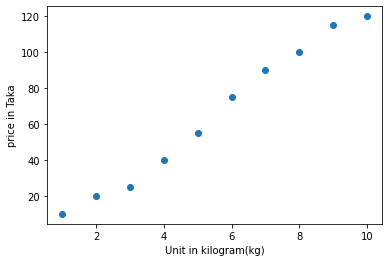

In [ ]:
# visualization 
%matplotlib inline
plt.xlabel('Unit in kilogram(kg)')
plt.ylabel('price in Taka')
plt.scatter(df.unit_kg, df.price)

In [ ]:
X = df[['unit_kg']] 

In [ ]:
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)


In [ ]:
X_train

,unit_kg
7,8
5,6
9,10
0,1
2,3


In [ ]:
X_test

,unit_kg
8,9
3,4
1,2
6,7
4,5


In [ ]:
y_train

7    100
5     75
9    120
0     10
2     25
Name: price, dtype: int64

In [ ]:
y_test

4     55
9    120
Name: price, dtype: int64

Here ceating ANN mode just like neuron

In [ ]:
#tensorflow 2 prefer "tf.keras" instade of "keras".
model = tf.keras.Sequential([
   tf.keras.layers.Dense(1, input_shape=[1], activation='linear')
])

In [ ]:
#model.summary() #test purpose if we want to know the model state

In [ ]:


#model.compile(optimizer='sgd',loss='mean_squared_error',metrics=['accuracy'])

model.compile(optimizer='sgd',
              loss='mean_squared_error',
             metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 301ms/step - loss: 7115.6733 - accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 184.6452 - accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 38.8082 - accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 35.5874 - accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 35.3658 - accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 35.2087 - accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 35.0544 - accuracy: 0.0000e+00
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 34.9017 - accuracy: 0.0000e+00
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 34.7506 - accuracy: 0.0000e+00
Epoch 10/500
1/1 [==============================] - 0s 8ms/step - loss: 34.6

In [ ]:
model.predict(X_test)

array([[109.76885 ],
       [ 45.645237],
       [ 19.995792],
       [ 84.11941 ],
       [ 58.469963]], dtype=float32)

In [ ]:
y_test

8    115
3     40
1     20
6     90
4     55
Name: price, dtype: int64

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 21.1711 - accuracy: 0.0000e+00 - 98ms/epoch - 98ms/step


In [ ]:
print(model.predict([1000]))

[[12819.07]]


User Input Prediction 

In [ ]:
x=float(input('To know the pridicted price,Enter the product killogram upto 1 : '))

import numpy as np 


my_prediction=model.predict([[x]])

price=np.asscalar(np.array(my_prediction)) #convert vector into scalar using this one line only

#convert vector into scalar using below two lines
#price=np.array(my_prediction) 
#price=price.item()

print(x,' killogram  price is =',price ,' Taka')

To know the pridicted price,Enter the product killogram upto 1 : 15
So 15.0  killogram  price is = 186.71719360351562  Taka


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  
